<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-Self-study/blob/master/6-3%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

## 차원과 차원 축소

- 들어가기 전에 먼저 차원(Dimension)에 대하여 설명함.

- 다차원 배열의 차원과 1차원 배열의 차원은 다른가?

 - 다차원 배열과 1차원 배열(벡터)에서 차원이라는 용어는 조금 다르게 사용함.
 
 - 다차원 배열의 경우 차원은 배열의 축 개수를 의미함. 가령 2차원 배열일 때는 행과 열이 차원임. 첫 번째 축인 행과 두 번째 축인 열이 있으므로 2차원임.

 - 1차원 배열(벡터)의 경우 차원은 원소 개수를 의미함. 원소 5개가 있다면 5차원 벡터라고 함.

 아래 그림(출처: 혼자 공부하는 머신러닝 + 딥러닝)을 참고하면 이해하기 쉬움.
<img src='https://drive.google.com/uc?export=view&id=1VSOObccPOgnAglYZMcRU_cpCsUwKkhnA'>
이 서적을 정리하면서 가능하면 차원 대신 특성을 사용함. 물론 차원이라는 단어를 완전히 배제할 수는 없으므로 다른 정리를 진행할 때는 두 단어를 혼용해서 사용할 예정임.

- 이전 챕터에서 과일 사진은 픽셀 10,000개를 가졌었고, 이는 특성 10,000개를 가진 셈임. 머신러닝에서는 이런 특성을 '차원(Dimension)'이라고도 부름. 차원 10,000개를 가졌다고도 표현할 수 있는데, 이런 차원이 많을수록 저장 공간을 많이 차지하게 됨. 비지도 학습 작업 중 하나인 '차원 축소(Dimensionality Reduction)' 알고리즘을 통해 차원을 줄이면 저장 공간을 크게 절약할 수 있음. 대표적인 차원 축소 알고리즘은 '주성분 분석(Principal component analysis)'임.

- 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법임. 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음.

## 주성분 분석 소개

- '주성분 분석(Principal component analysis)'은 줄여서 'PCA'라고 부르며, 데이터 분산이 큰 방향을 찾는 것으로 이해할 수 있음. 분산은 데이터가 널리 퍼져있는 정도를 의미하며, 분산이 큰 방향을 데이터로 잘 표현하는 벡터로 생각할 수 있음.

 2차원 데이터를 예로 들어서 아래 그림(출처: 혼자 공부하는 머신러닝 + 딥러닝)으로 설명함.

 각 그림에 대한 설명은 그림 밑에 위치함.

 <img src='https://drive.google.com/uc?export=view&id=1ZXmEyWmC6VoH2HQuC21rljiHEmn5V5Bl' width = 50% >
 
 이 데이터는 x1, x2 라는 특성 2개가 있음. 대각선으로 길게 늘어진 형태임.

 <img src='https://drive.google.com/uc?export=view&id=1fimjCebPmegOfWtnnTxO_icM88fRG6HM' width = 50%>
 
 분산이 가장 큰 방향, 즉 데이터 분포를 가장 잘 표현하는 방향을 나타냄. 직관적으로 보면 길게 늘어진 대각선 방향이 분산이 가장 크다는 점을 알 수 있음. 화살표가 오른쪽 위로 향하든 왼쪽 아래로 향하든 큰 의미는 없음. 분산이 큰 방향을 찾는 것이 중요함.

 <img src='https://drive.google.com/uc?export=view&id=1KfgnqH7w01OxvRjVXdocUSqPvDKJlPRx' width = 50%>
 
 이 직선이 원점에서 출발한다면 (2, 1)처럼 두 원소로 이루어진 벡터로 쓸 수 있음. 실제로 'PCA' 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰 주므로 데이터를 직접 원점에 맞출 필요가 없음. 여하튼 이 벡터를 '주성분(Principal component)'이라고 하며 원본 데이터에 있는 어떤 방향을 의미함. 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음.

 <img src='https://drive.google.com/uc?export=view&id=1wzK0Lijl1aaENTuXAkgiiVktx3vK64Xi' width = 50%>

 주성분을 사용하여 원본 데이터의 차원을 줄일 수 있음. 그림처럼 예를 들면 샘플 데이터 s(4, 2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4, 5)를 만들 수 있음. 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어듦. 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가진 특성을 가장 잘 나타냄.

 <img src='https://drive.google.com/uc?export=view&id=1aGSY0zm3RKysNsSkRGbjnBbFyHz2GWOO' width = 50%>

 첫 번째 주성분을 찾은 다음에 이 벡터에 수직이면서 분산이 가장 큰 다음 방향을 찾으면 이 찾은 벡터가 두 번째 주성분임. 여기서는 2차원이기 때문에 두 번째 주성분의 방향은 그림처럼 하나뿐임.
 
- 일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성 개수만큼 찾을 수 있다고 말함. 물론 기술적인 이유로 주성분은 원본 특성 개수와 샘플 개수 중 작은 값만큼 찾을 수 있음.

## PCA 클래스

- `PCA` 클래스는 주성분 분석을 수행하는 도구이며, 각 매개변수와 속성, 메서드는 아래 코드에서 예를 들어 설명하므로 대강 보고 넘어가도 무방함.

 - `n_components`: 주성분 개수를 지정하는 매개변수. 기본값은 `None`으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용함.

 - `random_state`: 넘파이 난수 시드 값을 지정하는 매개변수.

 - `components_`: 훈련 세트에서 찾은 주성분이 저장되는 속성.

 - `explained_variance_`: 설명된 분산이 저장되는 속성.

 - `explained_variance_ratio_`: 설명된 분산의 비율이 저장되는 속성.

 - `inverse_transform()`: `transform()` 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원하는 메서드.

### 데이터 준비

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2021-07-19 17:40:28--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-19 17:40:28--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-19 17:40:28--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
# `PCA` 클래스의 객체를 만들 때 `n_components` 매개변수에 주성분 개수를 지정해야 함.
# 비지도 학습이므로 `fit()` 메서드에 타깃값을 제공하지 않음.
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

# `PCA` 클래스가 찾은 주성분은 `n_components_` 속성에 저장됨.
print(pca.components_)
print()
print(pca.components_.shape)
# `n_components` 매개변수를 50으로 지정했기 때문에 `pca.components_` 배열의 첫 번째 차원이 50임.
# 즉 주성분 50개를 찾은 것임. 두 번째 차원은 원본 데이터의 특성 개수와 같은 10,000임.

[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701609e-05 -1.13551045e-05 -1.82152556e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220450e-05 -2.08401763e-05 -2.89870129e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-3.30038722e-06 -6.84608865e-05 -9.03626904e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.17225739e-05 -2.35560967e-05 -1.76667918e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.27290126e-04  1.49495331e-05 -5.64149215e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]

(50, 10000)


In [ ]:
# 원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력할 수 있음.
# 이전 절에서 사용했던 `draw_fruits()` 함수를 사용하여 그림을 그림.
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1) :
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), 
                            squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

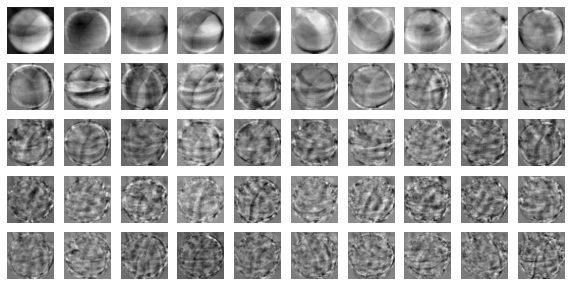

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 괴상한 사진이 출력됨.
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것임.
# 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것으로도 생각할 수 있음.

In [ ]:
# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성 개수를 10,000개에서 50개로 줄일 수 있음.
# 마치 원본 데이터를 각 주성분으로 분해한다고 생각할 수 있음.
# `PCA` 클래스의 `transform()` 메서드를 사용하여 원본 데이터의 차원을 50으로 줄임.
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 차원이 10,000에서 50으로 줄었음. 1/200 수준으로 줄어듦.
# 'fruits_2d' 대신 'fruits_pca' 를 저장하면 저장 공간을 훨씬 줄일 수 있음.

(300, 10000)
(300, 50)


### 원본 데이터 재구성

- 차원을 줄이면 데이터에 어느 정도 손실이 가해질 수밖에 없음. 다만 최대한 분산이 큰 방향으로 데이터를 투영했으므로 원본 데이터를 상당 부분 재구성할 수 있음.

In [ ]:
# `inverse_transform()` 메서드를 사용하여 특성 10,000개를 복원함.
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse)
print()
print(fruits_inverse.shape)
# 특성 10,000개가 복원됨.

[[1.06781702 1.05079244 1.07062112 ... 1.         1.         1.        ]
 [1.01518389 0.98580263 1.00797722 ... 1.         1.         1.        ]
 [1.06144516 1.05059665 1.06634272 ... 1.         1.         1.        ]
 ...
 [0.94201119 0.90619648 0.90093367 ... 1.         1.         1.        ]
 [0.5721101  0.96084799 0.75324501 ... 1.         1.         1.        ]
 [0.98608075 0.97508958 0.97635974 ... 1.         1.         1.        ]]

(300, 10000)


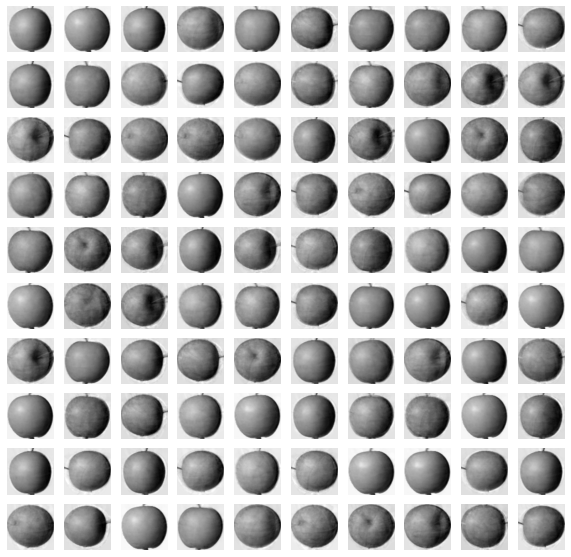

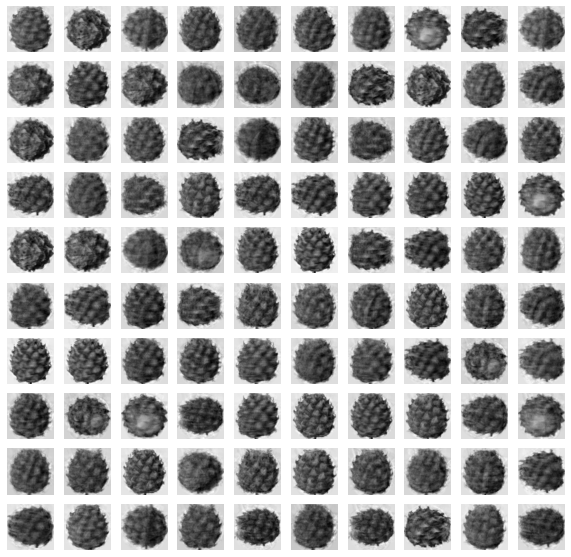

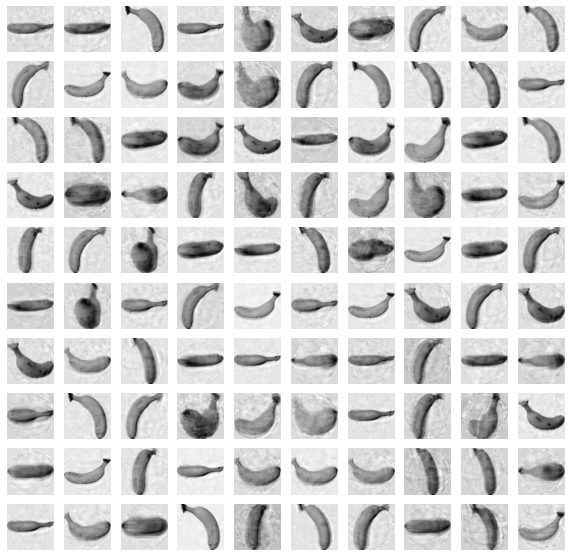

In [ ]:
# 이 복원된 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력함.
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200] : # 리스트에서 원소를 하나씩 꺼내서 'start' 객체에 넣고
    draw_fruits(fruits_reconstruct[start:start + 100]) # 'fruits_reconstruct' 객체에 저장된 데이터를 지정한 리스트에 대응하여 그림.
    print()
# 일부 흐리고 번진 부분이 있지만 나름 성공적으로 변환함.
# 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성했을 것임.

### 설명된 분산

- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 '설명된 분산(Explained variance)'이라고 함.

- `PCA` 클래스의 `explained_vaiance_ratio_` 속성에 각 주성분의 설명된 분산의 비율이 기록됨. 당연히 첫 번째 주성분의 설명된 분산이 가장 큼. 이 분산 비율을 모두 더하면 주성분 50개로 표현하는 총 분산 비율을 얻을 수 있음.

In [ ]:
print(np.sum(pca.explained_variance_ratio_))
# 92% 이상인 분산을 유지함.
# 원본 데이터로 복원했을 때 원본 이미지 품질이 높은 이유는 설명된 분산의 비율이 높기 때문임.

0.9214600466279158


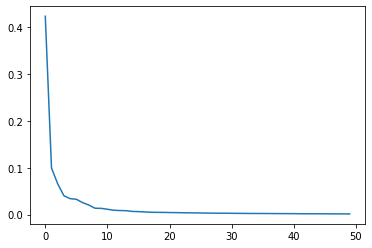

In [ ]:
# 설명된 분산의 비율을 그래프로 그리면 적절한 주성분 개수를 찾을 수 있음.
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 주성분 10개가 분산 대부분을 표현함.
# 그다음부터는 각 주성분이 설명하는 분산은 비교적 작음.

### 다른 알고리즘과 함께 사용하기

In [ ]:
# 원본 데이터를 사용할 때와 어떤 차이가 있는지 확인하기 위하여
# `PCA` 클래스로 차원이 축소된 데이터를 사용하여 지도학습 모델을 훈련함.
# 과일 사진 3개를 분류해야 하므로 로지스틱 회귀 모델을 사용하여 실험함.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 지도학습 모델을 사용하려면 타깃값이 있어야 하므로
# 사과는 0, 파인애플은 1, 바나나는 2로 지정함.
# 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복함.
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
# 먼저 원본 데이터인 'fruits_2d'를 사용함.
# 로지스틱 회귀 모델에서 성능을 가늠하기 위해 `cross_validate()` 함수로 교차 검증을 수행함.
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # `fit_time_`은 교차 검증 폴드의 훈련 시간이 기록된 속성임.
# 교차 검증 점수가 매우 높음.
# 특성이 10,000개나 되므로 샘플 300개에서는 금방 과대적합 된 모델을 만들기 쉬움.

0.9966666666666667
1.490079975128174


In [ ]:
# fruits_pca'를 사용했을 경우와 'fruits_2d'를 사용했을 경우를 비교함.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 특성 50개만 사용했는데 정확도가 100%에 훈련 시간은 훨씬 짦음.
# `PCA`로 훈련 데이터 차원을 축소하면 저장 공간 절약뿐만 아니라 모델 훈련 속도도 제고할 수 있음.

1.0
0.03751111030578613


In [ ]:
# `PCA` 클래스를 사용할 때 `n_components` 매개변수에 개수가 아닌 비율을 지정해도 됨.
# 지정한 비율에 도달할 때까지 자동으로 주성분을 찾음.
pca = PCA(n_components=0.5) # 설명된 분산의 50%에 달하는 주성분을 찾도록 지정함.
pca.fit(fruits_2d)
print(pca.n_components_)
# 특성 2개만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음.

2


In [ ]:
# 이 모델로 원본 데이터를 변환함.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# 주성분이 2개이므로 변환된 데이터 크기는 (300, 2)임.

(300, 2)


In [ ]:
# 특성 2개만 사용하고도 교차 검증 결과가 좋을지 확인함.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고가 뜸.
# 하지만 교차 검증 결과가 충분히 좋으므로 무시해도 됨.
# 아무튼 특성 2개를 사용했는데 정확도가 99%임.

0.9933333333333334
0.04848952293395996


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# 차원이 축소된 데이터를 사용하여 'k-평균' 알고리즘으로 클러스터를 찾아봄.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(km.labels_)
print(np.unique(km.labels_, return_counts=True))
# 2절에서 원본 데이터를 사용했을 때와 거의 비슷한 결과를 출력함.

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


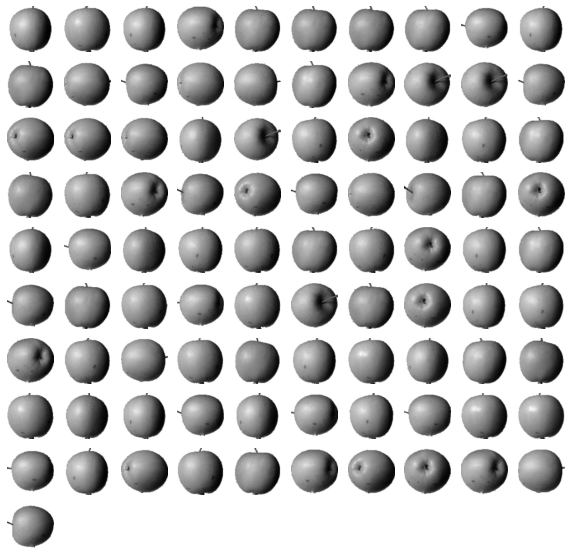

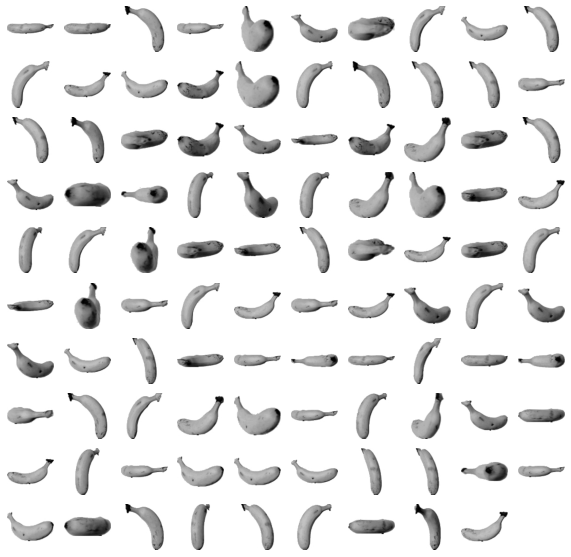

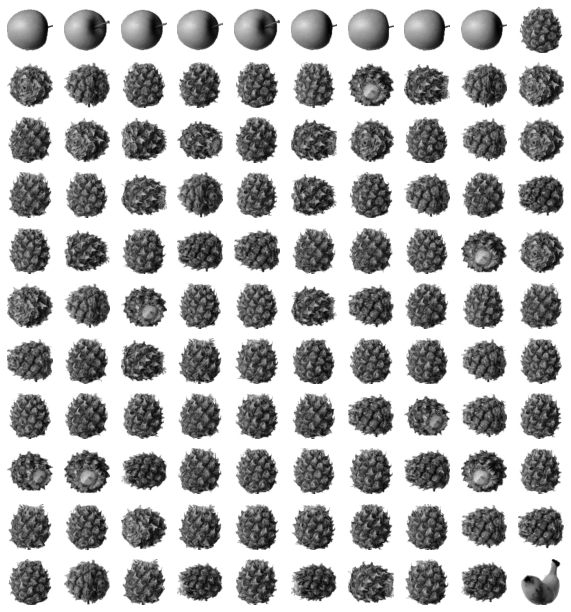

In [ ]:
# `KMeans` 클래스가 찾은 레이블을 사용하여 과일 이미지를 출력함.
for label in range(0, 3) :
    draw_fruits(fruits[km.labels_ == label])
    print()
# 2절에서 찾은 클러스터처럼 파인애플은 사과와 조금 섞임.

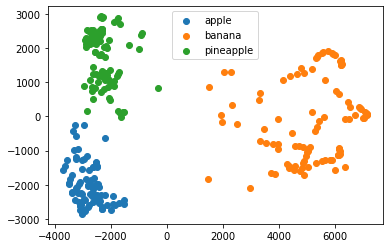

In [ ]:
# 훈련 데이터 차원을 3개 이하로 줄이면 시각화 하기 비교적 쉬움.
# 'fruits_pca' 데이터는 특성 2개가 있기 때문에 2차원으로 표현할 수 있음.
# `km.labels_` 속성을 사용하여 클러스터별로 나누어 산점도를 그림.
for label in range(0, 3) :
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1]) # x축에는 첫 번째 속성, y축에는 두 번째 속성을 그림.
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 각 클러스터의 산점도가 아주 잘 구분됨.
# 다만 사과와 파인애플의 경계가 가깝게 붙어 있으므로
# 위 그림처럼 이 두 클러스터의 샘플 몇 개가 혼동을 일으킴.